In [1]:
import sys
sys.path.append('/usr/local/lib')
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
sys.path.append('/usr/local/lib')

In [3]:
from suite_python import suite as s

In [4]:
s.initialize_suite()



 ................................................................................................................................................................................................................................................................






          ***********************************************************
          *         D I S C U S - S U I T E  Version 6.18.02        *
          *                                                         *
          *         OpenMP is active; maximum threads  16           *
          *         Created : 2025-01-24                            *
          *---------------------------------------------------------*
          * (c) R.B. Neder  (reinhard.neder@fau.de)                 *
          * (c) T. Proffen  (tproffen@ornl.gov    )                 *
          ***********************************************************

 Start directory  : \home\thomas\DiffuseCode\python\Notebooks\
 Access manuals at each section with   :

In [5]:
s.execute_macro("@powder.mac xray")
s.execute_macro("@powder.mac neut")

@powder.mac xray
 suite> set prompt,off,off


In [6]:
n=s.get_data_length(1)
x=np.empty(n, dtype=np.float32)
y=np.empty(n, dtype=np.float32)
s.get_data(1,x,y,n)

n=s.get_data_length(2)
x2=np.empty(n, dtype=np.float32)
y2=np.empty(n, dtype=np.float32)
s.get_data(2,x2,y2,n)

In [7]:
print(n)

5649


<IPython.core.display.Javascript object>


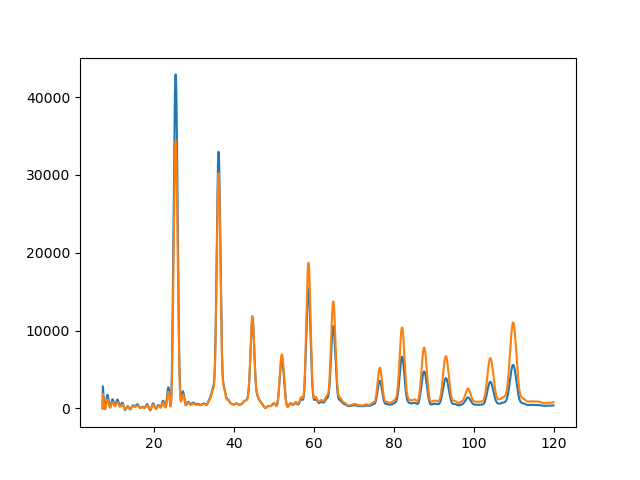

/home/thomas/.local/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/thomas/.local/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [8]:
plt.plot(x, y)
plt.plot(x2, 50*y2)
plt.show()

In [9]:
value=s.get_value("-24+3")
print(value)

-21.0


In [10]:
s.execute_macro("@vartest")

In [11]:
value=s.get_value("dummy")
print(value)

3.1414999961853027


In [12]:
s.set_value(10.3,"dummy")

In [13]:
value=s.get_value("dummy")
print(value)

10.300000190734863


In [14]:
print(s.get_data_sets())

2


In [15]:
value=s.get_value("array[1]")
print(value)

-2.299999952316284


In [16]:
n=s.get_data_length(-2)

 ***ER_PYTH*** Invalid data set selected                     ***  -1 ***


In [17]:
s.execute_macro("@plot3d")

In [18]:
n=s.get_data_length(1)

In [19]:
print(n)

3721


In [20]:
from matplotlib import cm

In [30]:
n=s.get_data_length(1)
nx=np.array(1, dtype=np.int32)
ny=np.array(2, dtype=np.int32)
x=np.empty(n, dtype=np.float32)
y=np.empty(n, dtype=np.float32)
z=np.empty(n, dtype=np.float32)
s.get_data_3d(1,x,y,z,nx,ny,n)

In [31]:
print(nx,ny)

61 61


In [32]:
x2=np.reshape(x,(nx,ny))
y2=np.reshape(y,(nx,ny))
z2=np.reshape(z,(nx,ny))

<IPython.core.display.Javascript object>


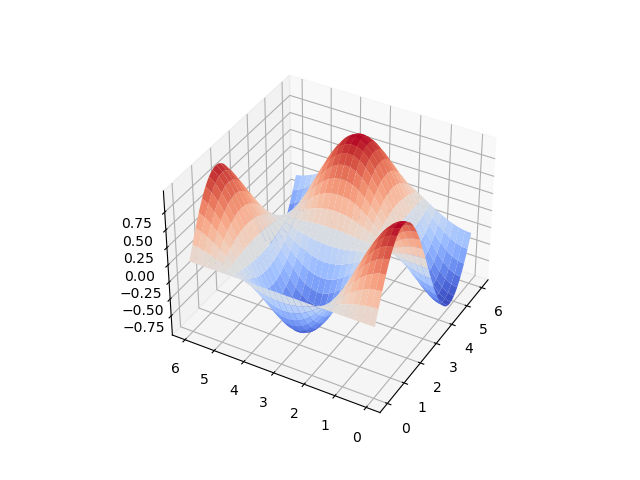

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x2,y2,z2, cmap=cm.coolwarm)